# Solution to Execise Sheet #1

### Homework group ID: 

# Bessel Functions 

In this notebook we want to verify two simple relations involving the Bessel
functions $J_n(x)$ of the first kind.  The relations are the  
asymptotic form of $J_n(x)$ for $x\gg n$ and the known recursion relation to obtain
$J_{n+1}(x)$ from $J_{n}(x)$ and $J_{n-1}(x)$:

- $J_n(x) \approx \sqrt{\frac{2}{\pi x}}\cos(x-(n\frac{\pi}{2}+\frac{\pi}{4}))$ for $x\gg n$
- $J_{n+1}(x) = \frac{2n}{x} J_n(x)-J_{n-1}(x)$

For more information on the funtions, visit the corresponding [Wikipedia article](https://en.wikipedia.org/wiki/Bessel_function).

We basically would like to check, how well the [scipy](https://scipy.org/) Bessel function implementation satisfies the above relations.

In [1]:
#Libraries and dependencies 
%matplotlib inline

import scipy.special as ss
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

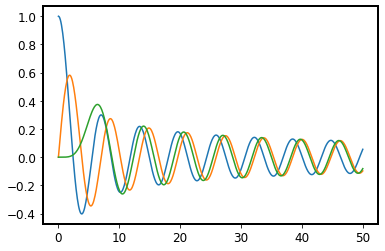

In [16]:
# Plot parameters
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['axes.linewidth'] = 2.0

# - asymptotic behaviour for large x
# Function that compute the asymptotic form.
def jn_asym(n,x):
    """Asymptotic form of jn(x) for x>>n"""

    return np.sqrt(2.0 / np.pi / x) * \
           np.cos(x - (n * np.pi / 2.0 + np.pi / 4.0))

# We choose to plot between 0 and 50. We exclude 0 because the
# recursion relation contains a division by it.
x = np.linspace(0., 50, 500)

# plot J_0, J_1 and J_5.
for n in [0, 1, 5]:
    plt.plot(x, ss.jn(n, x), label='$J_%d$' % (n))
plt.show()

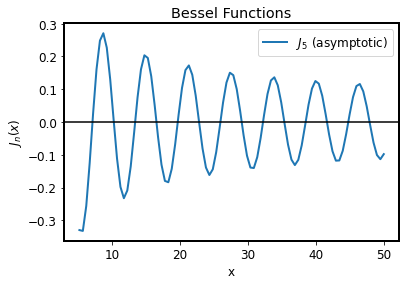

In [21]:
# and compute its asymptotic form (valid for x>>n, where n is the order).
# must first find the valid range of x where at least x>n.
x_asym = x[x > n]

#Plot of 
plt.plot(x_asym, jn_asym(n, x_asym), linewidth = 2.0,
         label='$J_%d$ (asymptotic)' % n)

# Finish the plot and show it
plt.title('Bessel Functions')
plt.xlabel('x')
# notet hat you also can use LaTeX for plot labels!
plt.ylabel('$J_n(x)$')

# horizontal line at 0 to show x-axis, but after the legend
plt.legend()
plt.axhline(0,c='k') # Here we changed the color to black

#The next line is not necessary in 
#Jupyter notebook (but it does in Python script).
# plt.show() 

We see that the asymptotic form is an excellent approximation for the Bessel function at large $x$-values.

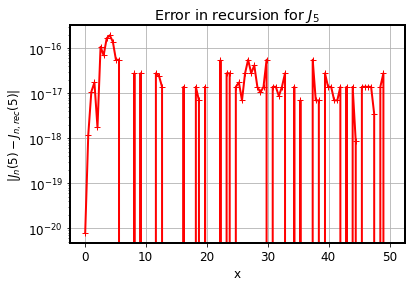

In [20]:
# - recursion relation

# Now, let's verify numerically the recursion relation
# J(n+1,x) = (2n/x)J(n,x)-J(n-1,x), n = 5

# We choose here to consider x-values  between 0.1 and 50.
# We exclude 0 because the recursion relation contains a
# formal division by it.
x = np.linspace(0.1, 50, 100)

# construct both sides of the recursion relation, these should be equal
n = 5

# the scipy implementation of jn(5);
j_n = ss.jn(5, x)

# The recursion relation:
j_n_rec = (2.0 * (n - 1) / x) * ss.jn(n - 1, x) - ss.jn(n - 2, x)

# We now plot the difference between the two formulas
# (j_n and j_n_rec above).  Note that to
# properly display the errors, we want to use a logarithmic y scale.
plt.semilogy(x, abs(j_n - j_n_rec), 'r+-', linewidth=2.0)

plt.title('Error in recursion for $J_%s$' % n)
plt.xlabel('x')
plt.ylabel('$|J_n(5) - J_{n,rec}(5)|$')
plt.grid()

#The next line is not necessary in 
#Jupyter notebook (but it does in Python script).
# plt.show() 

# Here we save the plot to a file
plt.savefig("bessel_error.png")


We see that the scipy Bessel-function implementation satisfies the recursion relation up to machine number precision ($|J_5(x) - J_{5, rec}|\approx 10^{-16}$)